  # **Industrial Copper Modeling**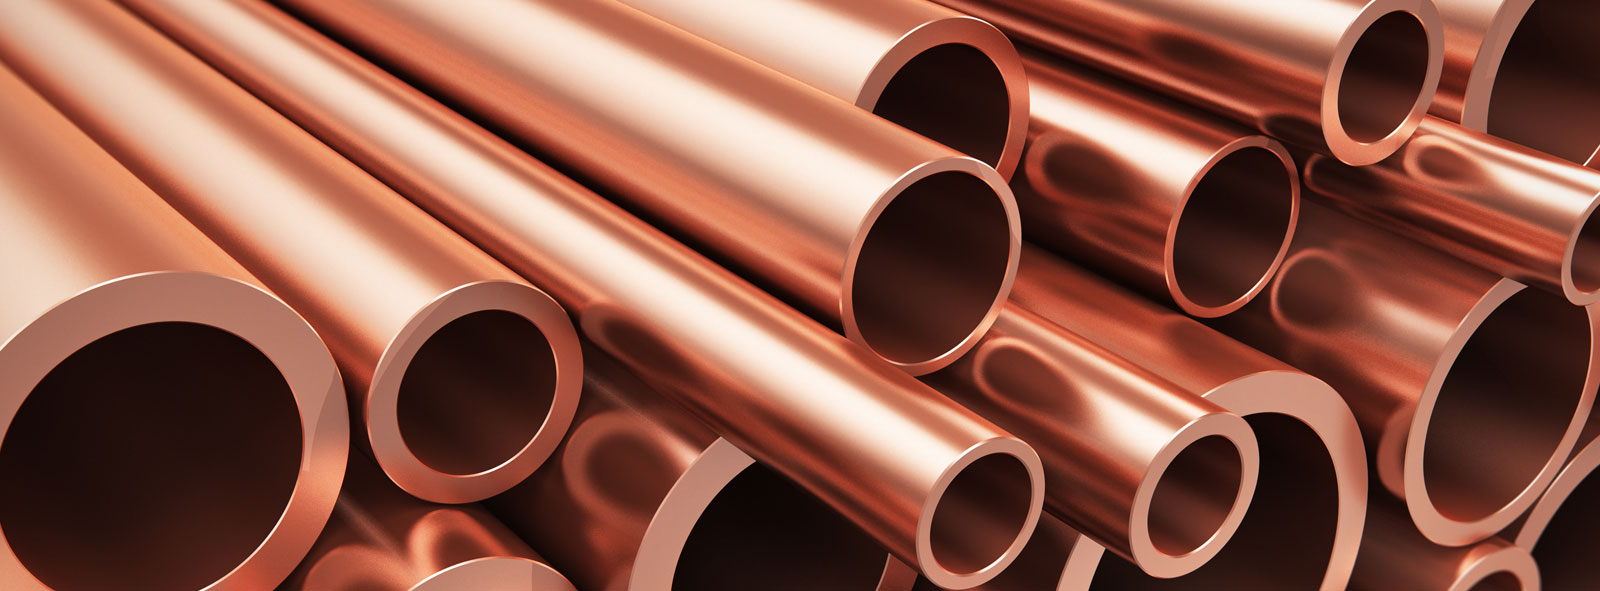





# **Problem defnition**

Indeed, using machine learning regression models can be highly beneficial for the copper industry to address the challenges posed by skewed and noisy data when it comes to sales and pricing. By leveraging advanced techniques like data normalization, feature scaling, and outlier detection, along with employing algorithms that are robust to such issues, the regression model can improve the accuracy of predictions and facilitate better pricing decisions.






## **Data Understanding**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
path='Copper_Set.xlsx'
my_data = pd.read_excel(path)

In [3]:
df=pd.DataFrame(my_data)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


**Data Cleaning**

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [6]:
print(df.columns)

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')


In [7]:
df.shape

(181673, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [9]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['product_ref']=pd.to_numeric(df['product_ref'],errors='coerce')

In [12]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [13]:
df.head(8)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,102325,1668701718,2021-04-01,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2021-04-01,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,1000944,611993,2021-01-01,931.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [15]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [17]:
df['material_ref'].fillna('unknown', inplace=True)
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [19]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

**EDA: Try visualizing outliers and skewness**


In [20]:
df1=df.copy()

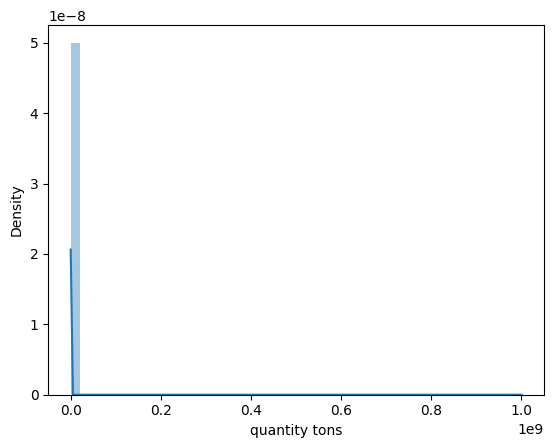

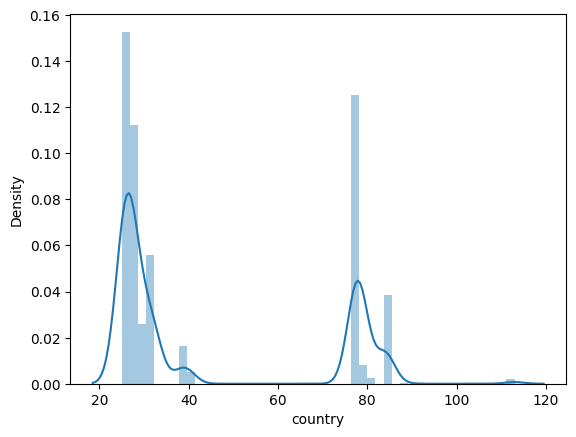

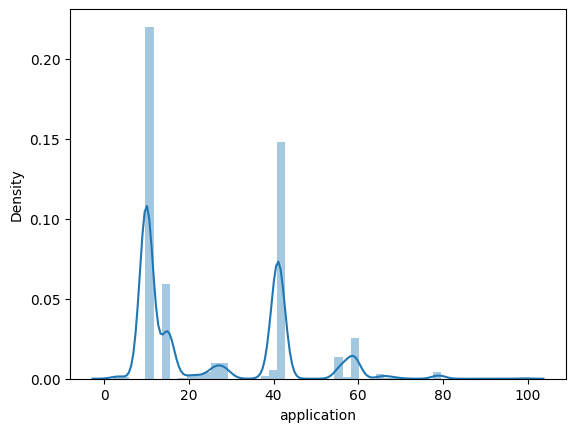

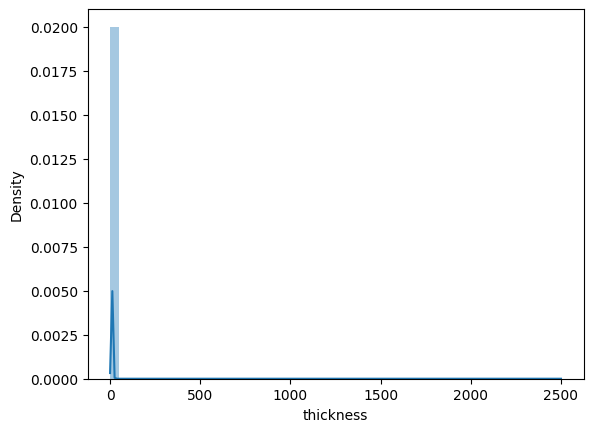

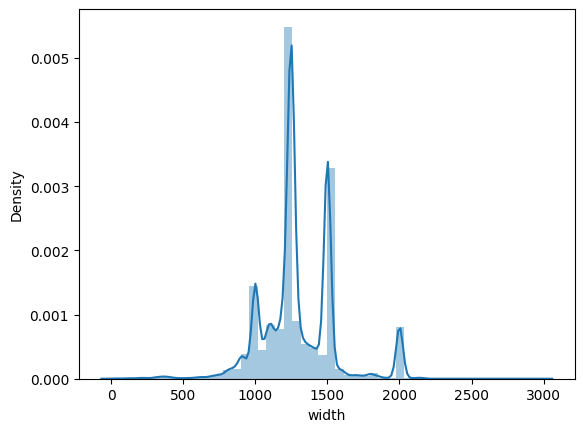

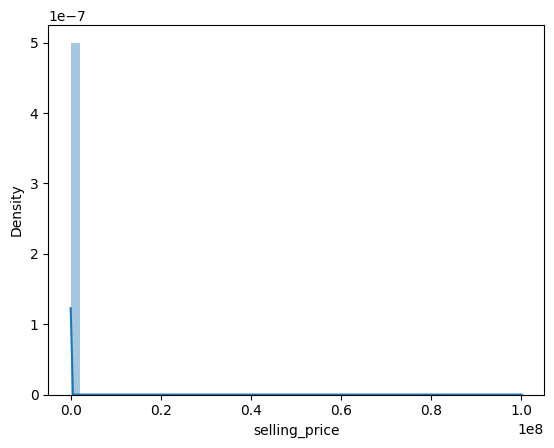

In [21]:
df1['quantity tons']   # skewed
df1['country']
df1['application']
df1['thickness']       # skewed
df1['width']
df1['selling_price']   # skewed
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df1['quantity tons'],kde=True)
plt.show()
sns.distplot(df1['country'],kde=True)
plt.show()
sns.distplot(df1['application'],kde=True)
plt.show()
sns.distplot(df1['thickness'],kde=True)
plt.show()
sns.distplot(df1['width'],kde=True)
plt.show()
sns.distplot(df1['selling_price'],kde=True)
plt.show()

In [22]:
data = df1['selling_price'] <= 0
print(data.sum())
df1.loc[data,'selling_price'] = np.nan
data = df1['quantity tons'] <= 0
print(data.sum())
df1.loc[data,'quantity tons'] = np.nan
data =df1['thickness'] <= 0
print(data.sum())
df1.loc[data,'thickness'] = np.nan

7
4
0


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181627 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181624 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [24]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [25]:
df1.dropna(inplace=True)
len(df1)

181620

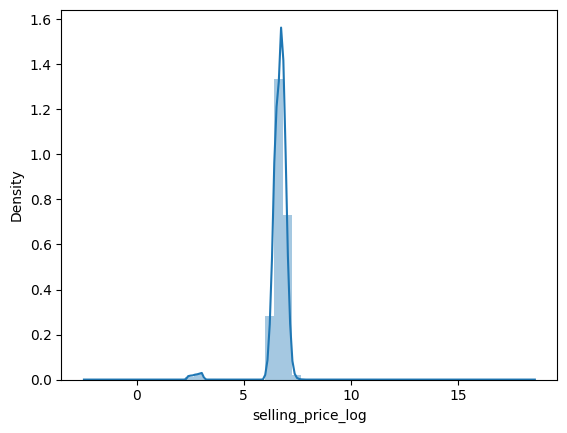

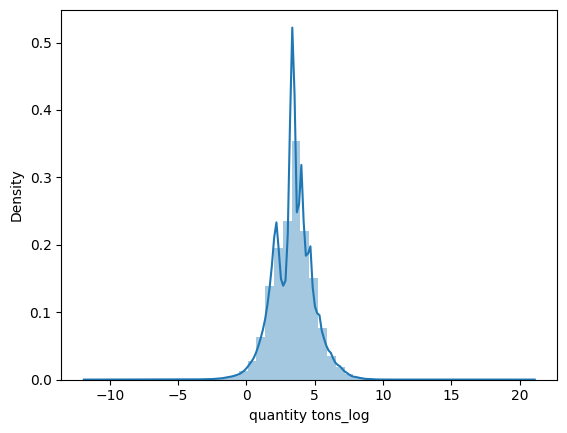

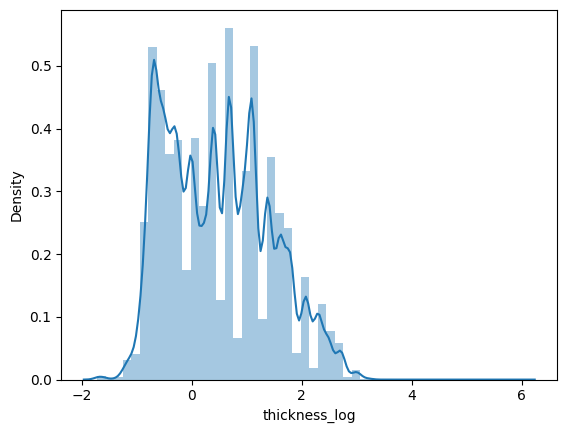

In [26]:
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity tons_log'])
plt.show()
df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()

In [27]:
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181620 non-null  object 
 1   item_date          181620 non-null  object 
 2   quantity tons      181620 non-null  float64
 3   customer           181620 non-null  float64
 4   country            181620 non-null  float64
 5   status             181620 non-null  object 
 6   item type          181620 non-null  object 
 7   application        181620 non-null  float64
 8   thickness          181620 non-null  float64
 9   width              181620 non-null  float64
 10  material_ref       181620 non-null  object 
 11  product_ref        181620 non-null  int64  
 12  delivery date      181620 non-null  object 
 13  selling_price      181620 non-null  float64
 14  selling_price_log  181620 non-null  float64
 15  quantity tons_log  181620 non-null  float64
 16  thickne

In [29]:
selected_columns = ['quantity tons_log', 'selling_price_log', 'thickness_log',
                    'width', 'application', 'country', 'customer', 'product_ref']
subset_df = df1[selected_columns]
data = subset_df.corr()

In [30]:
print(data)

                   quantity tons_log  selling_price_log  thickness_log  \
quantity tons_log           1.000000           0.023898       0.042005   
selling_price_log           0.023898           1.000000      -0.154999   
thickness_log               0.042005          -0.154999       1.000000   
width                       0.034431          -0.069453       0.387243   
application                 0.063991           0.022665      -0.197563   
country                    -0.088899          -0.029110      -0.065203   
customer                    0.080141           0.008731       0.079971   
product_ref                 0.064064           0.001181       0.234330   

                      width  application   country  customer  product_ref  
quantity tons_log  0.034431     0.063991 -0.088899  0.080141     0.064064  
selling_price_log -0.069453     0.022665 -0.029110  0.008731     0.001181  
thickness_log      0.387243    -0.197563 -0.065203  0.079971     0.234330  
width              1.000000  

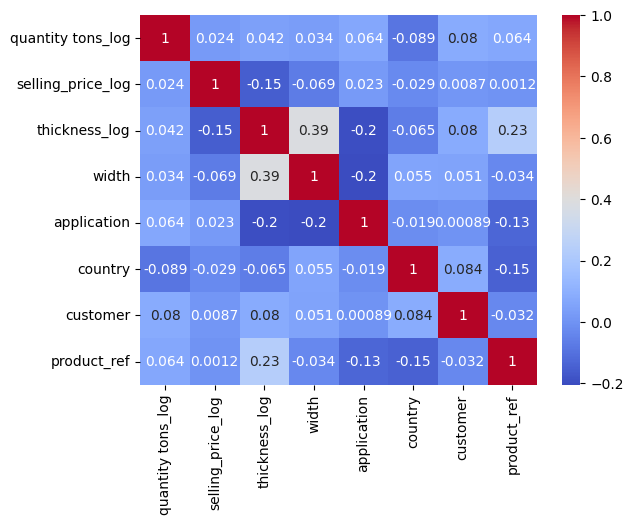

In [31]:
sns.heatmap(data,annot=True,cmap="coolwarm")
plt.show()

**Model Building and Evaluation using Regression Models**
**----to predict selling price---**

In [32]:
print(df1.columns)

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181620 non-null  object 
 1   item_date          181620 non-null  object 
 2   quantity tons      181620 non-null  float64
 3   customer           181620 non-null  float64
 4   country            181620 non-null  float64
 5   status             181620 non-null  object 
 6   item type          181620 non-null  object 
 7   application        181620 non-null  float64
 8   thickness          181620 non-null  float64
 9   width              181620 non-null  float64
 10  material_ref       181620 non-null  object 
 11  product_ref        181620 non-null  int64  
 12  delivery date      181620 non-null  object 
 13  selling_price      181620 non-null  float64
 14  selling_price_log  181620 non-null  float64
 15  quantity tons_log  181620 non-null  float64
 16  thickne

In [34]:
df1.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_log    0
quantity tons_log    0
thickness_log        0
dtype: int64

In [35]:
df1.dropna(inplace=True)
len(df1)

181620

In [36]:
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

X=df1[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the encoder to a file
joblib.dump(ohe, 'ohe.joblib')
joblib.dump(ohe2, 'ohe2.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [38]:
# test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((145296, 23), (36324, 23), (145296,), (36324,))

In [39]:
from sklearn.tree import DecisionTreeRegressor
import pickle

# decision tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

# Save the model to a file
with open('Regressor.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 0.030236281495680993
Mean absolute error: 0.1350666782212099
R-squared: 0.9057611722376351


In [40]:
# Prediction of selling price
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:,[7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [737.97409589]


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.852923560282426
-8.619124099229313e+21


In [43]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7645243992414124
0.7741574415740741


In [44]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8756863496588736
0.8855799393606376


**Model Building and Evaluation using Classification ML models**
**--to predict won/lost--**

In [45]:
print(len(df1))
df1.head(3)

181620


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [46]:
df2 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df2)

150427

In [47]:
df2.status.value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In [48]:
print(len(df2))
df2.head(3)

150427


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584


In [49]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
X= df2[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]
Y = df2['status']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y)
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application',
                       'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the encoder to a file
joblib.dump(ohe, 'ohec.joblib')
joblib.dump(scaler, 'scalerc.joblib')

['scalerc.joblib']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120341, 15), (30086, 15), (120341, 1), (30086, 1))

Accuracy: 0.911154689888985
Confusion Matrix:
[[ 5682  1320]
 [ 1353 21731]]


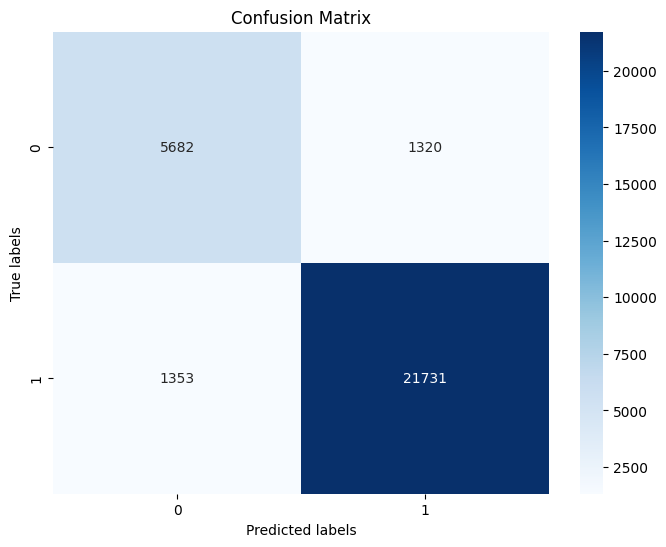

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
#draw heatmap
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [52]:
import pickle
# Save the model to a file
with open('Classifier.pkl', 'wb') as file:
    pickle.dump(dtc, file)

Accuracy: 0.911154689888985
f1_score: 0.911154689888985
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



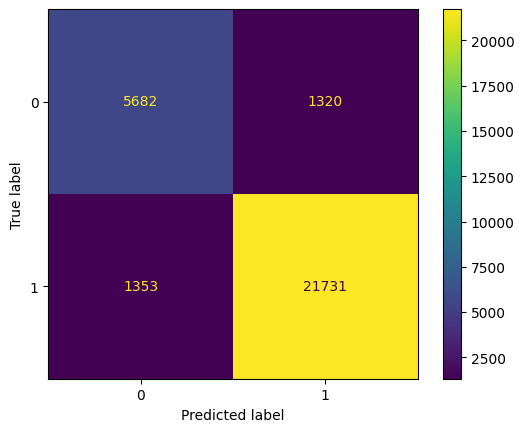

In [53]:
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1_score=f1_score(y_test,y_pred, average = 'macro')
print(f"f1_score: {accuracy}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()


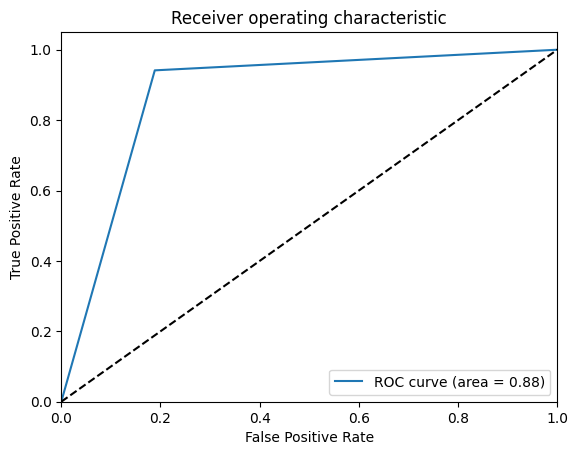

In [54]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [55]:
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost


0.9062165014417364
0.8643555141926478


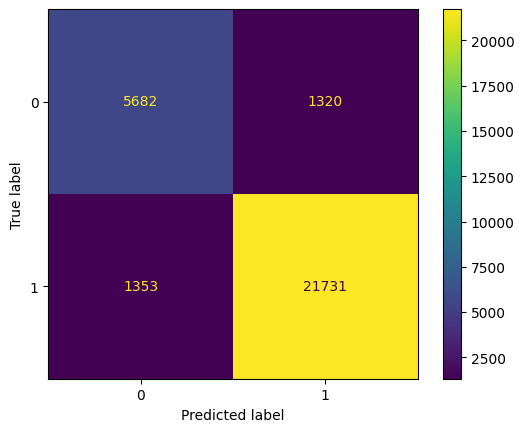

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
cm = confusion_matrix(y_test,y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [57]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8167623669406104
0.8152961510337033


In [58]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.789415078817693
0.7859469520707306
